In [4]:
import seaborn as sns

In [5]:
import numpy as np
import pandas as pd

In [6]:

df_aps2012 = pd.read_csv("data/aps2012.csv", encoding = "latin1")
df_aps2012.shape

(24803, 245)

In [7]:
## clear all values for '1'(male) in column 'sex' 
df_aps2012f = df_aps2012[df_aps2012.sex != 1]


In [8]:
print (df_aps2012f.shape)

(12814, 245)


In [9]:
df_aps2012f.head(5)

,CASEID,alc_01,alc_02g,alc_03g,cc1_01,cc1_03al,cc1_03rs,cc1_03ni,cc1_03h,cc1_03on,...,ta_04oth,ta_04f,pumfwght,geo_pc,sex,ms_01g,dsizhhgg,dhhtypeg,id_03g,id_05g
0,2000,2,6,6,6,6,6,6,6,6,...,2,6,11.630052,2,2,3,5,3,1,1
1,2001,2,6,6,6,6,6,6,6,6,...,6,2,22.096115,2,2,4,4,1,1,1
2,2002,1,2,3,6,6,6,6,6,6,...,1,6,10.403459,4,2,2,5,1,2,2
3,2003,1,2,3,6,6,6,6,6,6,...,6,1,44.362974,1,2,4,5,1,2,2
5,2005,6,6,6,2,2,2,1,2,2,...,6,6,10.105269,2,2,6,5,1,2,2


In [10]:
df_aps2012f['sex'].value_counts()

2    12814
Name: sex, dtype: int64

# Food Security and Mental Health

In [11]:
df_aps2012f['fs_01'].value_counts()

3    9497
2    2221
1     632
9     409
7      31
8      24
Name: fs_01, dtype: int64

In [12]:
df_aps2012_no_nan = df_aps2012f.copy()

## does "greater than include the number in the command or does it start
## from the next number

## replacing the values with nan if equal to or above 6

df_aps2012_no_nan["fs_01"][ df_aps2012_no_nan["fs_01"] >= 6 ] = np.nan
df_aps2012_no_nan["fs_02"][ df_aps2012_no_nan["fs_02"] >= 6 ] = np.nan
df_aps2012_no_nan["fs_03"][ df_aps2012_no_nan["fs_03"] >= 6 ] = np.nan
df_aps2012_no_nan["fs_04"][ df_aps2012_no_nan["fs_04"] >= 6 ] = np.nan
df_aps2012_no_nan["fs_05"][ df_aps2012_no_nan["fs_05"] >= 6 ] = np.nan
df_aps2012_no_nan["fs_06"][ df_aps2012_no_nan["fs_06"] >= 6 ] = np.nan

df_aps2012_no_nan["mh_01g"][ df_aps2012_no_nan["mh_01g"] >= 6] = np.nan

# df_aps2012_no_nan[ df_aps2012_no_nan["fs_02"] < 7]
# df_aps2012_no_nan[ df_aps2012_no_nan["fs_03"] < 7]
# df_aps2012_no_nan[ df_aps2012_no_nan["fs_04"] < 6]
# df_aps2012_no_nan[ df_aps2012_no_nan["fs_05"] < 7]
# df_aps2012_no_nan[ df_aps2012_no_nan["fs_06"] < 7]
# df_aps2012_no_nan[ df_aps2012_no_nan["mh_01g"] < 5]

C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [13]:
df_aps2012_no_nan.shape

(12814, 245)

In [14]:
df_aps2012_no_nan['fs_01'].value_counts()

3.0    9497
2.0    2221
1.0     632
Name: fs_01, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000181A9558550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000181AAD55A20>]], dtype=object)

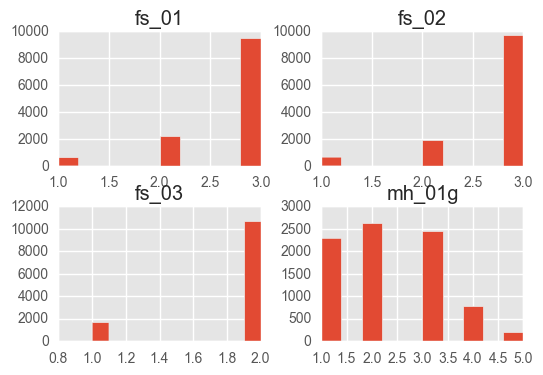

In [15]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

df_aps2012_no_nan[['mh_01g', 'fs_01', 'fs_02', 'fs_03']].hist()

fs_01 being "Food Security - Food didn't last/no money to buy more - Past 12 months"

1 - often true
2 - sometimes true
3 - never true

So the highest rates of reporting for food not lasting are in "never true"

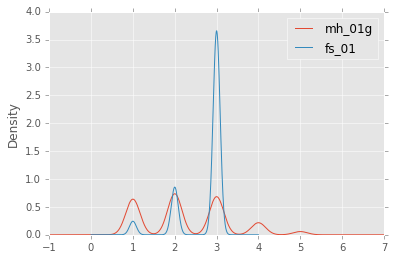

In [47]:
#density plot
df_aps2012_no_nan[['mh_01g', 'fs_01']].plot.kde()


In [22]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_01'])

In [24]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_01'], normalize = 'all')

In [25]:
x_tab

fs_01,1.0,2.0,3.0
mh_01g,,,
1.0,0.005910,0.031480,0.237125
2.0,0.012302,0.048124,0.255578
3.0,0.019660,0.074056,0.198770
4.0,0.011579,0.024967,0.055723
5.0,0.005789,0.006754,0.012182


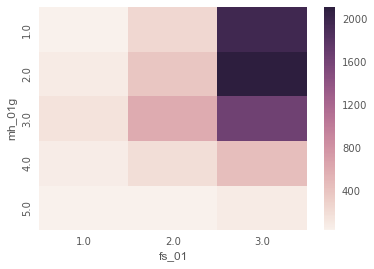

In [23]:
## generating heatmap. make sure to install seaborn to do this
sns.heatmap(x_tab)

In [62]:
from scipy.stats.stats import pearsonr

df_fs01 = df_aps2012_no_nan[['mh_01g', 'fs_01']]
df_fs01 = df_fs01.dropna()

In [65]:
## fs_01
print(pearsonr(df_fs01['mh_01g'], df_fs01['fs_01']))

(-0.23744915995608729, 1.2851548889852822e-106)


In [49]:
print(pearsonr(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_05']))

(nan, 1.0)


In [50]:
print(pearsonr(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_06']))

(nan, 1.0)


In [51]:
print(pearsonr(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_02']))

(nan, 1.0)


In [52]:
print(pearsonr(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_03']))

(nan, 1.0)


In [53]:
print(pearsonr(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_04']))

(nan, 1.0)


In [54]:
print(pearsonr(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_05']))

(nan, 1.0)


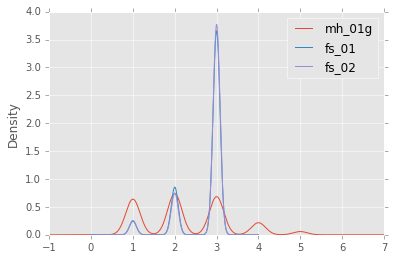

In [66]:
df_aps2012_no_nan[['mh_01g', 'fs_01','fs_02']].plot.kde()

In [26]:
## df.plot.scatter(x = 'SCHLN', y = 'L_PERNP')
## trying to make a scatterplot with one of those line things going 
## through it
#
# x = df_aps2012_no_nan['mh_01g']
# y = df_aps2012_no_nan['fs_01']
# m, b = np.polyfit(x, y, 1)

# plt.plot(x, y, '.')
# plt.plot(x, m*x + b, '-')

In [24]:
dffood = df_aps2012_no_nan[['fs_01', 'fs_05', 'fs_06']]

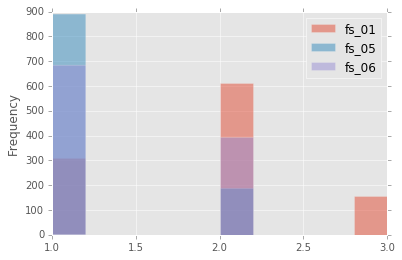

In [20]:
dffood = df_aps2012_no_nan[['fs_01', 'fs_05', 'fs_06']]
dffood.plot.hist(alpha = 0.5)

#### balanced meals 12 months

In [ ]:
## food security - balanced meals 12 months
## df_aps2012_no_nan[['mh_01g', 'fs_02']].hist()

In [ ]:
## density plot
## df_aps2012_no_nan[['mh_01g', 'fs_01']].plot.kde()

In [ ]:
## from scipy.stats.stats import pearsonr

## print(pearsonr(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_02']))

### Pregnancy and Mental Health

In [ ]:
## df_aps2012_no_nan = df_aps2012_no_nan[ df_aps2012_no_nan["prg_03g"] < 6]

In [ ]:
## df[['L_PERNP', 'SCHLN']].plot.kde()

## df_aps2012_no_nan[['mh_01g', 'prg_03g']].plot.kde()

In [ ]:
## print(pearsonr(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['prg_03g']))

### Alcohol and Mental Health

In [21]:
df_aps2012_no_nan = df_aps2012_no_nan[ df_aps2012_no_nan["alc_01"] < 6]
df_aps2012_no_nan = df_aps2012_no_nan[ df_aps2012_no_nan["alc_02g"] < 6]
df_aps2012_no_nan = df_aps2012_no_nan[ df_aps2012_no_nan["alc_03g"] < 6]
df_aps2012_no_nan = df_aps2012_no_nan[ df_aps2012_no_nan["mh_01g"] < 5]

In [22]:
print (df_aps2012_no_nan['alc_01'].value_counts())
print (df_aps2012_no_nan['alc_02g'].value_counts())
print (df_aps2012_no_nan['alc_03g'].value_counts())

1    768
Name: alc_01, dtype: int64
2    284
1    275
3     94
4     80
5     35
Name: alc_02g, dtype: int64
2    235
3    223
1    223
4     87
Name: alc_03g, dtype: int64


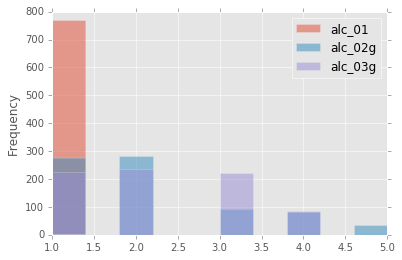

In [23]:
dfalc = df_aps2012_no_nan[['alc_01', 'alc_02g', 'alc_03g']]
dfalc.plot.hist(alpha = 0.5)

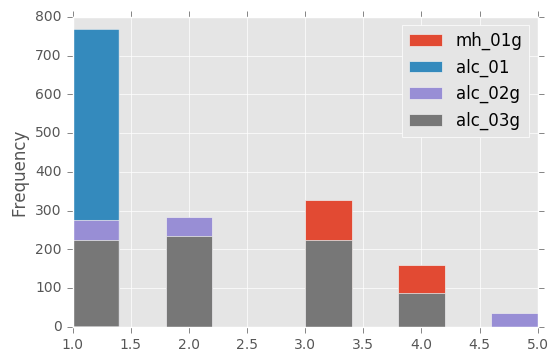

In [146]:
df_aps2012_no_nan[['mh_01g','alc_01', 'alc_02g', 'alc_03g',]].plot.hist()

## df_aps2012_no_nan[['mh_01g', 'fs_01','fs_05','fs_06',]].plot.kde()

LinAlgError: singular matrix

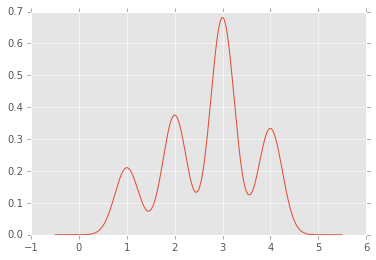

In [27]:
df_aps2012_no_nan[['mh_01g', 'alc_01','alc_02g','alc_03g']].plot.kde()

## can't get this one to run properly for some reason
## the histogram for the exact same set works fine

In [141]:
dfalc.head()

,mh_01g,alc_01,alc_02g,alc_03g
2,4,1,2,3
15,3,1,2,1
52,2,1,1,1
66,3,1,1,2
86,4,1,1,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12250e240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1226c0208>]], dtype=object)

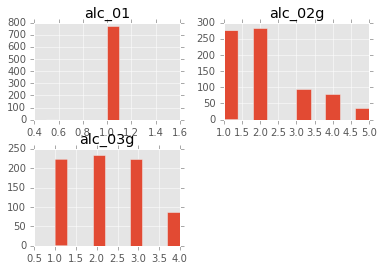

In [29]:
dfalc.hist()

## this one plots weird. each row is plotted individually


In [30]:
from scipy.stats.stats import pearsonr

print(pearsonr(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['alc_03g']))

(0.099544856631700013, 0.0057618479831206037)


In [31]:

from statsmodels.formula.api import ols

model = ols("mh_01g ~ alc_03g", df_aps2012_no_nan).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mh_01g   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     7.666
Date:                Fri, 03 Mar 2017   Prob (F-statistic):            0.00576
Time:                        11:20:11   Log-Likelihood:                -1039.1
No. Observations:                 768   AIC:                             2082.
Df Residuals:                     766   BIC:                             2091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.5006      0.083     30.066      0.000         2.337     2.664
alc_03g        0.0945      0.034      2.769      0.006         0.027     0.161
==============================================================================
Omnibus:                       66.738   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.962
Skew:                          -0.317   Prob(JB):                     1.15e-07
Kurtosis:                       2.227   Cond. No.                         6.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## dfalc.plot.scatter()

LinAlgError: singular matrix

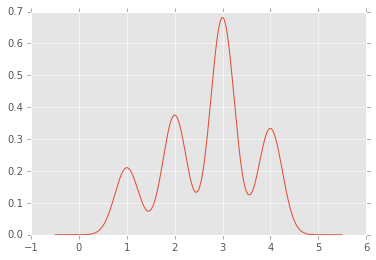

In [32]:
df_aps2012_no_nan[['mh_01g', 'alc_01','alc_02g','alc_03g',]].plot.kde()

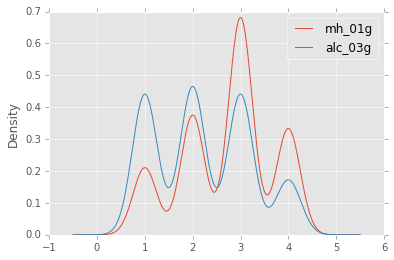

In [33]:
df_aps2012_no_nan[['mh_01g', 'alc_03g',]].plot.kde()